In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
housing = pd.read_csv('../datasets/housing.csv', index_col=0)
housing.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
import pymc3 as pm

In [9]:
housing_dict = dict(MEDV=housing['MEDV'].values, 
                    CRIM=housing['CRIM'].values)
# housing_dict

In [10]:
with pm.Model() as model:
    pm.glm.glm('MEDV ~ CRIM', housing_dict) # glm: general linear model
    start = pm.find_MAP() # Find starting value by optimization
    step = pm.NUTS(scaling=start) # Instantiate MCMC sampling algorithm, NUT is one way to do it
    trace = pm.sample(2000, step, progressbar=True) # draw 2000 posterior samples using NUTS sampling

Applied log-transform to sd and added transformed sd_log_ to model.
100%|██████████| 2000/2000 [00:02<00:00, 955.51it/s]


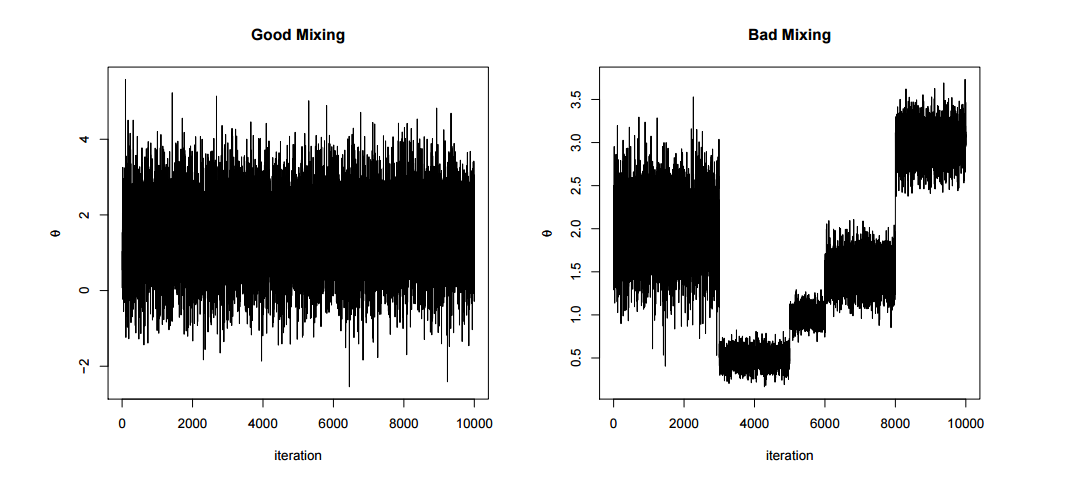

In [16]:
from IPython.display import Image
Image('../datasets/traceplot examples.PNG')

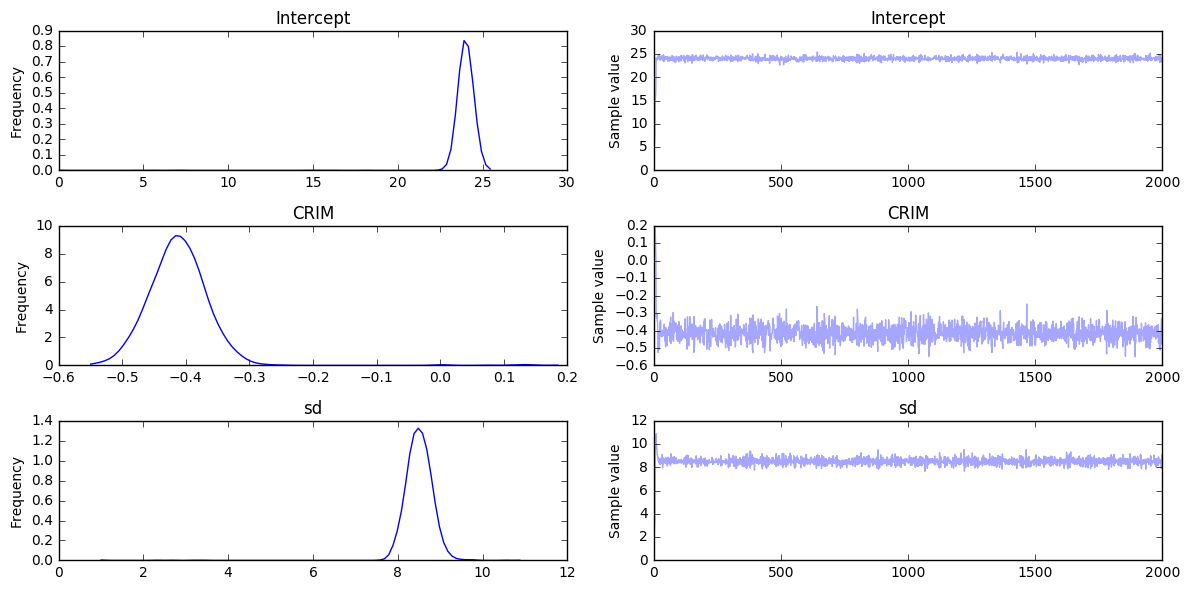

In [14]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace)
plt.tight_layout()

In [15]:
pm.summary(trace)


Intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  23.942           1.219            0.076            [23.309, 24.810]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  23.254         23.747         24.006         24.279         24.773


CRIM:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.410           0.056            0.003            [-0.497, -0.327]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.496         -0.440         -0.413         -0.384         -0.323


sd:

  Mean             SD               MC Error         95% HPD interval
  -------------------

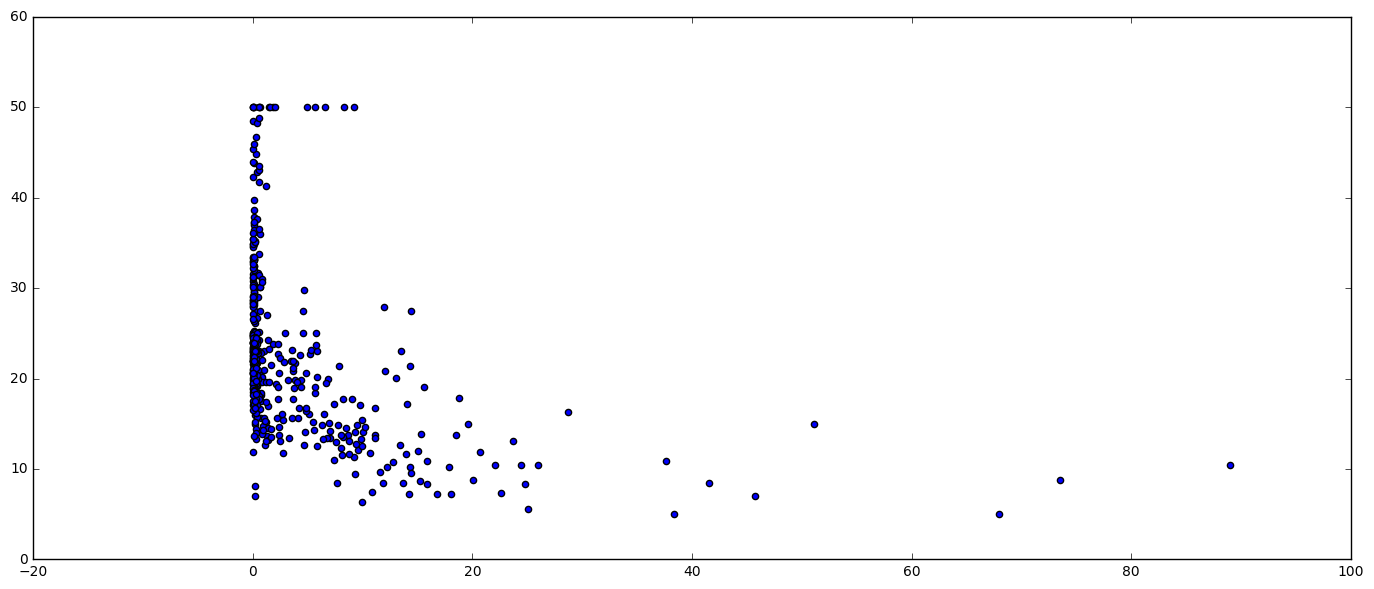

In [19]:
# Output the data to get a view of the regular data
plt.figure(figsize=(17, 7))
plt.scatter(housing['CRIM'], housing['MEDV'])

(-5, 100)

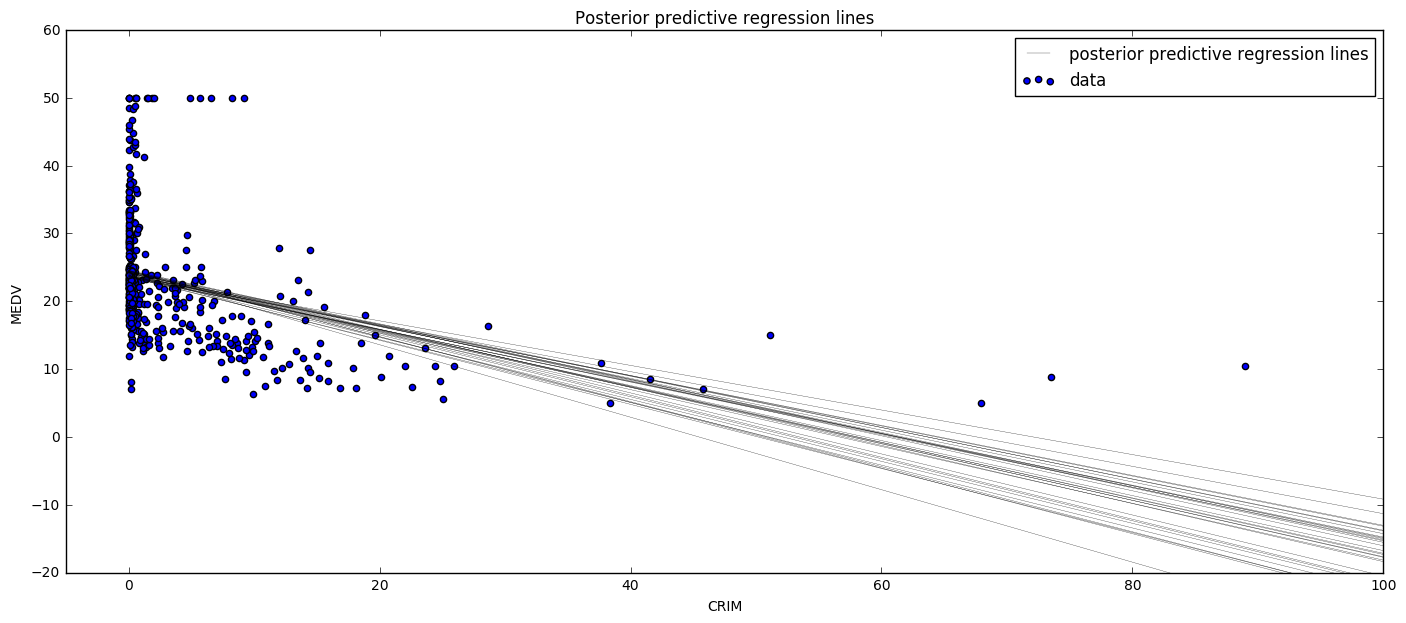

In [26]:
lm = lambda x, samp: samp['Intercept'] + samp['CRIM'] * x # like y=alpha+betha*x
plt.figure(figsize=(17, 7))
pm.glm.plot_posterior_predictive(trace, 
                                 eval=np.linspace(100, 0), # what to map the lines to (in this case, 0-100)
                                 lm=lm, # How to model the the findings -- add intercept and 'CRIM' * x for each of the 2000 runthroughs
                                 label='posterior predictive regression lines')
plt.scatter(housing['CRIM'], housing['MEDV'], label='data')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.ylim(-20,60)
plt.xlim(-5, 100)

In [29]:
housing.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'MEDV'],
      dtype='object')

In [32]:
housing_dict = dict(MEDV=housing['MEDV'].values, 
                    CRIM=housing['CRIM'].values,
                    NOX=housing['NOX'].values, 
                    LSTAT=housing['LSTAT'].values, 
                   )
# housing_dict

In [33]:
with pm.Model() as model:
    pm.glm.glm('MEDV ~ CRIM + NOX + LSTAT', housing_dict) # glm: general linear model
    start = pm.find_MAP() # Find starting value by optimization
    step = pm.NUTS(scaling=start) # Instantiate MCMC sampling algorithm, NUT is one way to do it
    trace = pm.sample(2000, step, progressbar=True) # draw 2000 posterior samples using NUTS sampling

Applied log-transform to sd and added transformed sd_log_ to model.
100%|██████████| 2000/2000 [00:03<00:00, 500.25it/s]


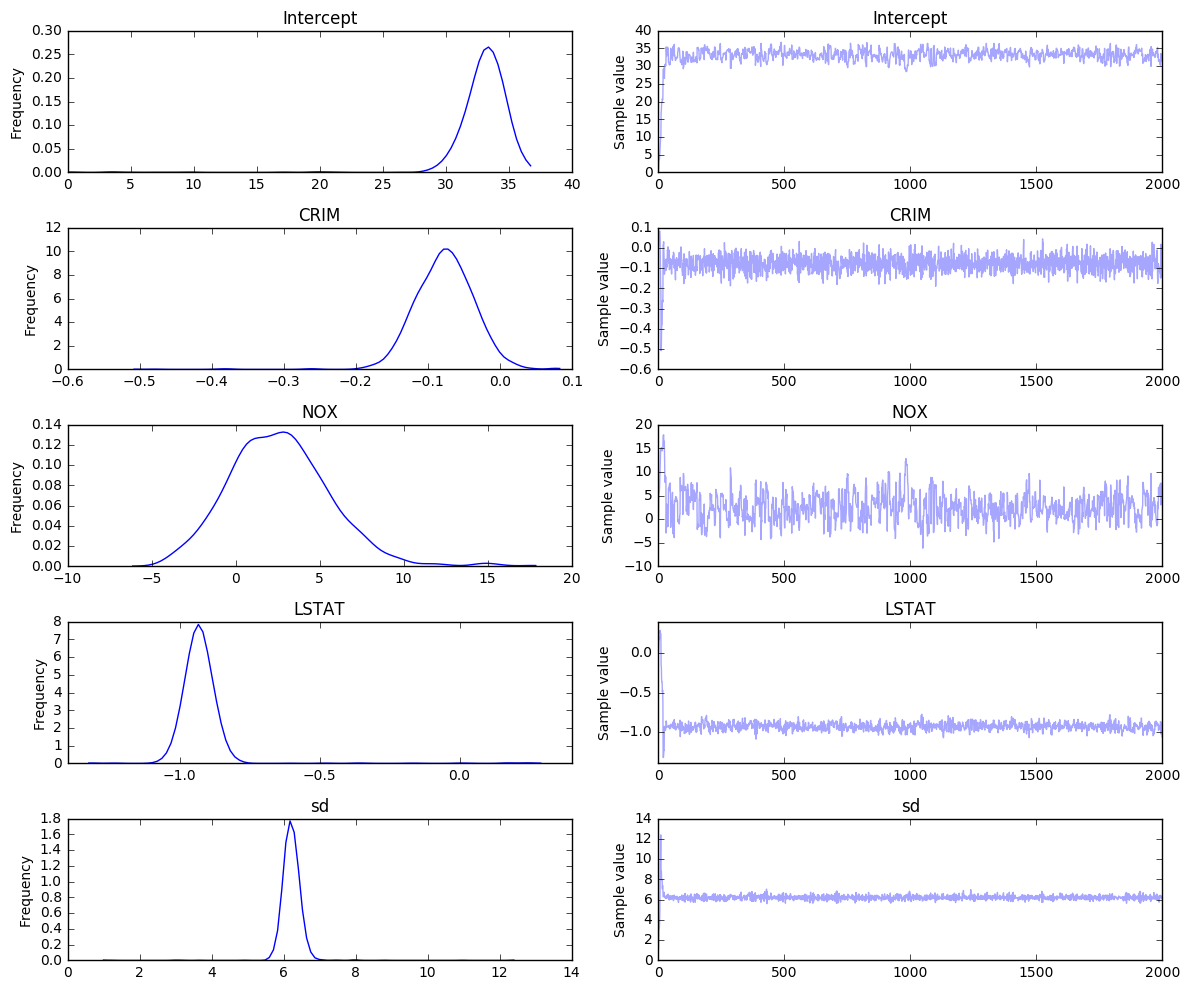

In [34]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace)
plt.tight_layout()

In [35]:
pm.summary(trace)


Intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  32.956           2.765            0.235            [30.155, 36.044]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  29.880         32.262         33.255         34.165         35.844


CRIM:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.077           0.043            0.001            [-0.152, -0.003]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.152         -0.103         -0.076         -0.050         -0.002


NOX:

  Mean             SD               MC Error         95% HPD interval
  ------------------

In [36]:
housing['NOX'].mean()

0.5546950592885372

In [37]:
housing['LSTAT'].mean()

12.653063241106723

marginal effect

(-5, 100)

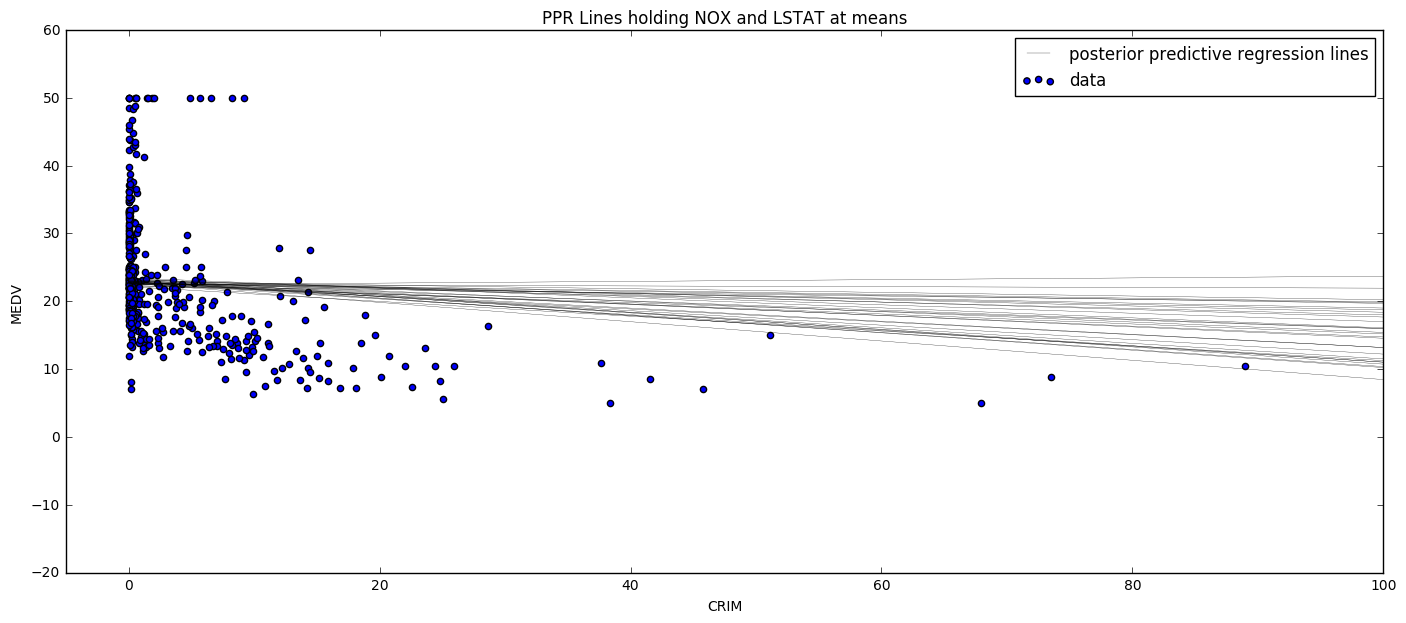

In [55]:
lm = lambda x, samp: samp['Intercept'] + samp['CRIM'] * x + samp['NOX']*housing['NOX'].mean() + samp['LSTAT']*housing['LSTAT'].mean()
plt.figure(figsize=(17, 7))
pm.glm.plot_posterior_predictive(trace, 
           eval=np.linspace(100, 0), # what to map the lines to (in this case, 0-100)
           lm=lm, # How to model the the findings -- add intercept and 'CRIM' * x for each of the 2000 runthroughs
           label='posterior predictive regression lines')
plt.scatter(housing['CRIM'], housing['MEDV'], label='data')

plt.title('PPR Lines holding NOX and LSTAT at means')
plt.legend(loc=0)
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.ylim(-20,60)
plt.xlim(-5, 100)

(-5, 100)

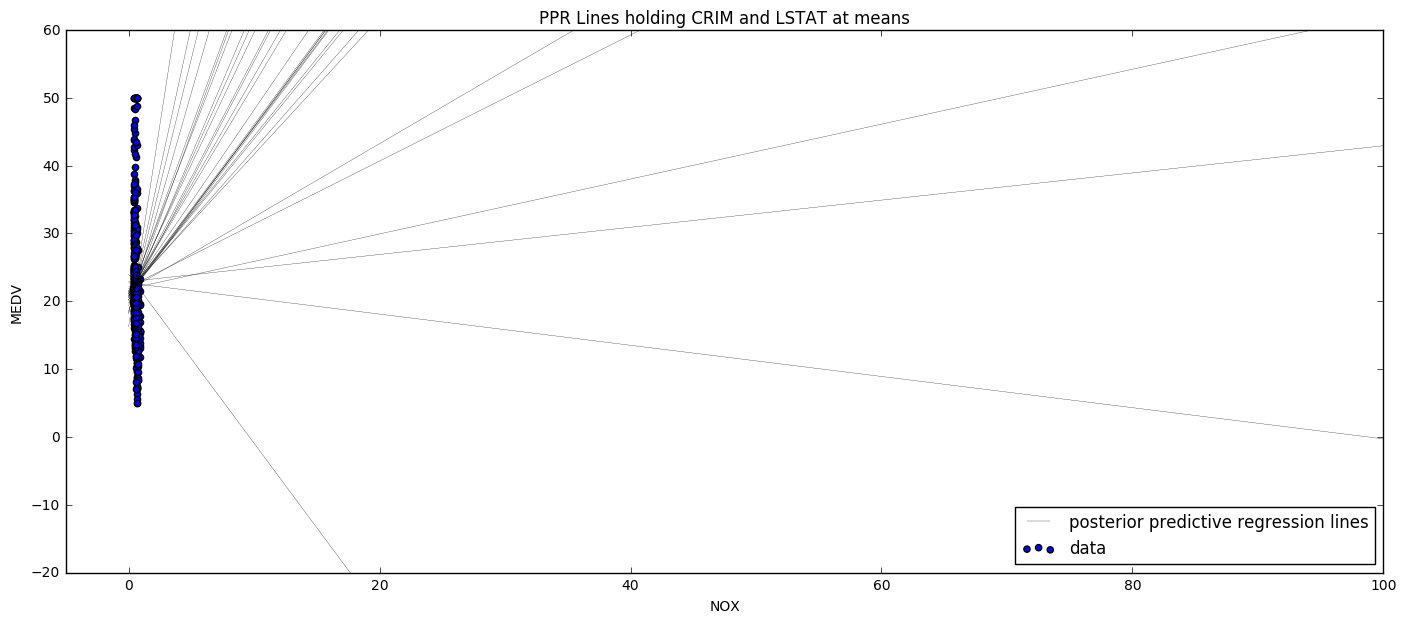

In [54]:
lm = lambda x, samp: samp['Intercept'] + samp['NOX'] * x + samp['CRIM']*housing['CRIM'].mean() + samp['LSTAT']*housing['LSTAT'].mean()
plt.figure(figsize=(17, 7))
pm.glm.plot_posterior_predictive(trace, 
             eval=np.linspace(100, 0), # what to map the lines to (in this case, 0-100)
             lm=lm, # How to model the the findings -- add intercept and 'CRIM' * x for each of the 2000 runthroughs
             label='posterior predictive regression lines')
plt.scatter(housing['NOX'], housing['MEDV'], label='data')

plt.title('PPR Lines holding CRIM and LSTAT at means')
plt.legend(loc=0)
plt.xlabel('NOX')
plt.ylabel('MEDV')
plt.ylim(-20,60)
plt.xlim(-5, 100)

(-5, 100)

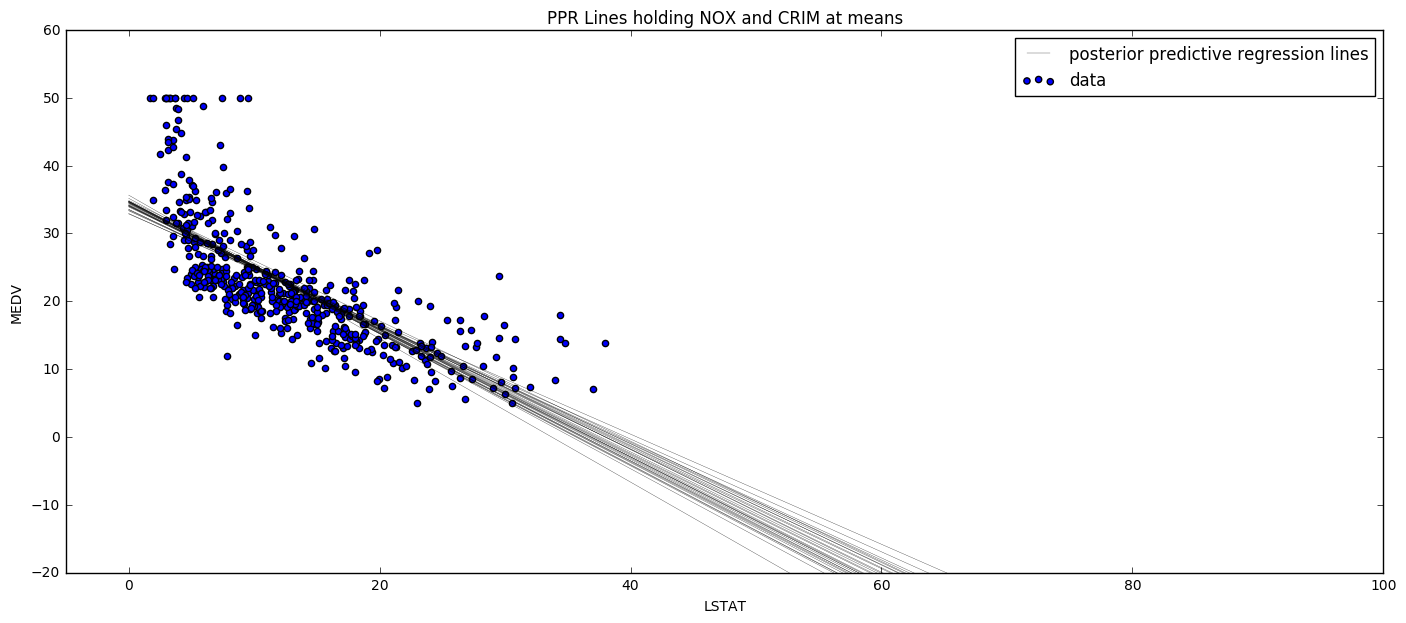

In [53]:
lm = lambda x, samp: samp['Intercept'] + samp['LSTAT'] * x + samp['CRIM']*housing['CRIM'].mean() + samp['NOX']*housing['NOX'].mean()
plt.figure(figsize=(17, 7))
pm.glm.plot_posterior_predictive(trace, 
          eval=np.linspace(100, 0), # what to map the lines to (in this case, 0-100)
          lm=lm, # How to model the the findings -- add intercept and 'CRIM' * x for each of the 2000 runthroughs
          label='posterior predictive regression lines')
plt.scatter(housing['LSTAT'], housing['MEDV'], label='data')

plt.title('PPR Lines holding NOX and CRIM at means')
plt.legend(loc=0)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.ylim(-20,60)
plt.xlim(-5, 100)

In [48]:
def predict_housing_value(crime_rate, nox, lstat):
    average_intercept=trace['Intercept'].mean()
    average_crime_coef=trace['CRIM'].mean()
    average_nox_coef=trace['NOX'].mean()
    average_lstat_coef=trace['LSTAT'].mean()
    return average_intercept + average_crime_coef*crime_rate + average_nox_coef*nox, average_lstat_coef*lstat

In [49]:
predict_housing_value(housing['CRIM'].mean(), 
                      housing['NOX'].mean(), 
                      housing['LSTAT'].mean())

(34.145878785068845, -11.680064786350247)

In [50]:
housing[['CRIM', 'NOX', 'LSTAT']].describe()

,CRIM,NOX,LSTAT
count,506.000000,506.000000,506.000000
mean,3.613524,0.554695,12.653063
std,8.601545,0.115878,7.141062
min,0.006320,0.385000,1.730000
25%,0.082045,0.449000,6.950000
50%,0.256510,0.538000,11.360000
75%,3.677082,0.624000,16.955000
max,88.976200,0.871000,37.970000
